<a href="https://colab.research.google.com/github/Sathyapriyaiitm/Projectsiitm/blob/main/battery_life_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EV Battery Health Predictor

- objective: predict the RUL(Remaining user life) or SOH(state of health) based on usage patterns, temp and voltage logs
- Approach: Utilise the regression models on time series sensor data to forecast battery degradation
- Deployment: Creative web applicaton

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Battery_RUL.csv')
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

print(x)
print(y)

[[1.00000000e+00 2.59530000e+03 1.15148850e+03 ... 5.46000100e+03
  6.75501000e+03 1.07778200e+04]
 [2.00000000e+00 7.40864000e+03 1.17251250e+03 ... 5.50899200e+03
  6.76202000e+03 1.05003500e+04]
 [3.00000000e+00 7.39376000e+03 1.11299200e+03 ... 5.50899300e+03
  6.76202000e+03 1.04203800e+04]
 ...
 [1.11000000e+03 7.69120000e+02 1.79357143e+02 ... 9.15513000e+02
  1.41231000e+03 6.63712000e+03]
 [1.11100000e+03 7.73880000e+02 1.62374667e+02 ... 5.39375000e+02
  1.14800000e+03 7.66062000e+03]
 [1.11200000e+03 6.77537270e+05 1.42740640e+05 ... 4.96800040e+04
  5.99830140e+05 5.99830140e+05]]
[1112 1111 1110 ...    2    1    0]


In [ ]:

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
imputer.fit(x[:, 1:3])
x[:, 1:3] = imputer.transform(x[:, 1:3])

print(x)

[[1.00000000e+00 2.59530000e+03 1.15148850e+03 ... 5.46000100e+03
  6.75501000e+03 1.07778200e+04]
 [2.00000000e+00 7.40864000e+03 1.17251250e+03 ... 5.50899200e+03
  6.76202000e+03 1.05003500e+04]
 [3.00000000e+00 7.39376000e+03 1.11299200e+03 ... 5.50899300e+03
  6.76202000e+03 1.04203800e+04]
 ...
 [1.11000000e+03 7.69120000e+02 1.79357143e+02 ... 9.15513000e+02
  1.41231000e+03 6.63712000e+03]
 [1.11100000e+03 7.73880000e+02 1.62374667e+02 ... 5.39375000e+02
  1.14800000e+03 7.66062000e+03]
 [1.11200000e+03 6.77537270e+05 1.42740640e+05 ... 4.96800040e+04
  5.99830140e+05 5.99830140e+05]]


In [ ]:

x = df.drop(columns=["RUL"])  # RUL = Remaining Useful Life
y = df["RUL"]

In [ ]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#linear regression
lr = LinearRegression()
lr.fit(x_train, y_train)

#random forest
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
#evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R²:", r2_score(y_test, y_pred))

print("Linear Regression:")
evaluate_model(lr, x_test, y_test)

print("\nRandom Forest:")
evaluate_model(rf, x_test, y_test)

Linear Regression:
MAE: 4.644132173754416
RMSE: 7.385328067449544
R²: 0.9994734493523346

Random Forest:
MAE: 2.0848257550614
RMSE: 3.7457789142904283
R²: 0.9998645481789141


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}
grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring="neg_mean_absolute_error")
grid.fit(x_train, y_train)

print("Best Params:", grid.best_params_)
best_model = grid.best_estimator_

Best Params: {'max_depth': 20, 'n_estimators': 200}


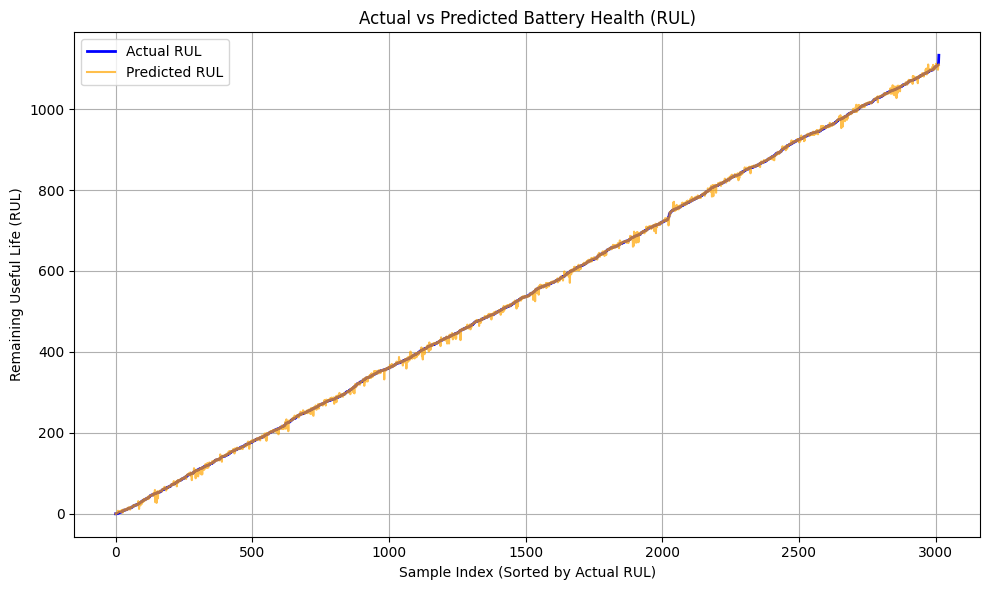

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


y_pred = rf.predict(x_test)
sorted_indices = np.argsort(y_test.values)
sorted_actual = y_test.values[sorted_indices]
sorted_pred = y_pred[sorted_indices]

# Plot as line graph
plt.figure(figsize=(10, 6))


plt.plot(sorted_actual, label='Actual RUL', color='blue', linewidth=2)


plt.plot(sorted_pred, label='Predicted RUL', color='orange', linewidth=1.5, alpha=0.7)

plt.title('Actual vs Predicted Battery Health (RUL)')
plt.xlabel('Sample Index (Sorted by Actual RUL)')
plt.ylabel('Remaining Useful Life (RUL)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

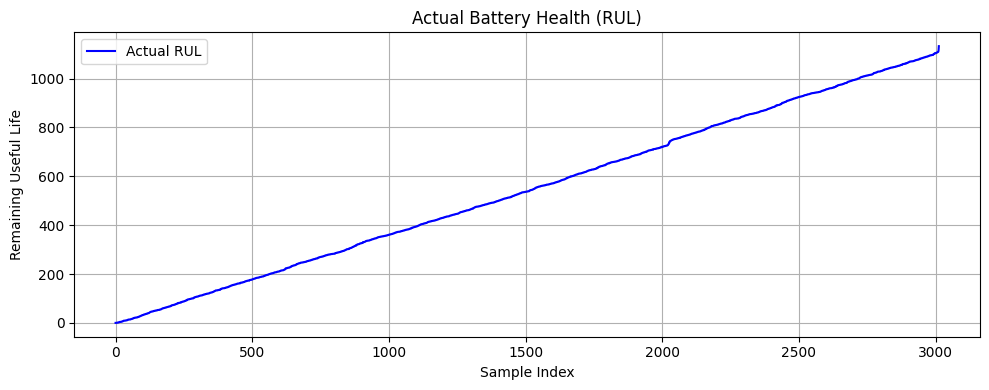

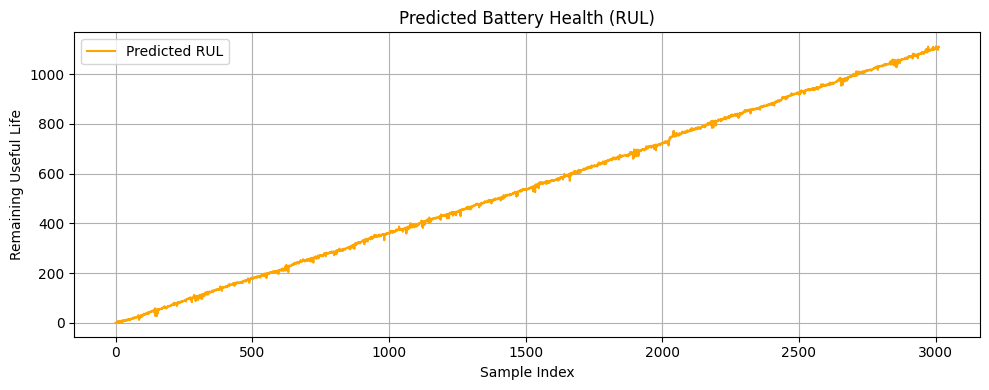

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

sorted_indices = np.argsort(y_test.values)
sorted_actual = y_test.values[sorted_indices]
sorted_pred = y_pred[sorted_indices]

# Plot Actual RUL
plt.figure(figsize=(10, 4))
plt.plot(sorted_actual, label='Actual RUL', color='blue')
plt.title('Actual Battery Health (RUL)')
plt.xlabel('Sample Index')
plt.ylabel('Remaining Useful Life')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot Predicted RUL
plt.figure(figsize=(10, 4))
plt.plot(sorted_pred, label='Predicted RUL', color='orange')
plt.title('Predicted Battery Health (RUL)')
plt.xlabel('Sample Index')
plt.ylabel('Remaining Useful Life')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd


N = 20
rul_df = pd.DataFrame({
    "Actual RUL": sorted_actual[:N],
    "Predicted RUL": sorted_pred[:N],
    "Error": abs(sorted_actual[:N] - sorted_pred[:N])
})


print(rul_df)

    Actual RUL  Predicted RUL  Error
0            0           0.12   0.12
1            0           0.47   0.47
2            0           0.00   0.00
3            0           1.70   1.70
4            0           0.26   0.26
5            1           2.20   1.20
6            1           3.65   2.65
7            1           2.73   1.73
8            1           1.83   0.83
9            1           7.46   6.46
10           2           3.81   1.81
11           2           4.99   2.99
12           2           5.18   3.18
13           3           5.20   2.20
14           3           6.40   3.40
15           4           6.14   2.14
16           4           4.61   0.61
17           4           5.03   1.03
18           4           7.19   3.19
19           4           3.98   0.02
